In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo, list_available_datasets

In [3]:
#List of UCI repositories with ID
list_available_datasets()

-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Annealing                                                                               3     
Audiology (Standardized)                                                                8     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Balloons                       

In [4]:
# Fetch the 'adult' dataset from UCI repository where id for dataset is 2
adult_dataset = fetch_ucirepo(id=2)

In [5]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#Creating dataframe by joining features and target
X = pd.DataFrame(adult_dataset.data.features)
Y = pd.DataFrame(adult_dataset.data.targets, columns=['income'])
adultDf= pd.concat([X,Y], axis = 1)
adultDf

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [7]:
adultDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [8]:
adultDf.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
# Checking for missing values using isnull
adultDf.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [10]:
# For checking summary statistics for categorical columns
adultDf.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,47879,48842,48842,47876,48842,48842,48842,48568,48842
unique,9,16,7,15,6,5,2,42,4
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,24720


In [11]:
filter_a=adultDf[adultDf['occupation'] == '?']
print(filter_a)

       age workclass  fnlwgt     education  education-num  \
27      54         ?  180211  Some-college             10   
61      32         ?  293936       7th-8th              4   
69      25         ?  200681  Some-college             10   
77      67         ?  212759          10th              6   
106     17         ?  304873          10th              6   
...    ...       ...     ...           ...            ...   
32530   35         ?  320084     Bachelors             13   
32531   30         ?   33811     Bachelors             13   
32539   71         ?  287372     Doctorate             16   
32541   41         ?  202822       HS-grad              9   
32542   72         ?  129912       HS-grad              9   

              marital-status occupation   relationship                race  \
27        Married-civ-spouse          ?        Husband  Asian-Pac-Islander   
61     Married-spouse-absent          ?  Not-in-family               White   
69             Never-married     

In [12]:
#filtering multiple columns to check for ?
filter_a=adultDf[(adultDf['occupation']=='?')  &
               (adultDf['workclass']=='?') ]
print(filter_a)

       age workclass  fnlwgt     education  education-num  \
27      54         ?  180211  Some-college             10   
61      32         ?  293936       7th-8th              4   
69      25         ?  200681  Some-college             10   
77      67         ?  212759          10th              6   
106     17         ?  304873          10th              6   
...    ...       ...     ...           ...            ...   
32530   35         ?  320084     Bachelors             13   
32531   30         ?   33811     Bachelors             13   
32539   71         ?  287372     Doctorate             16   
32541   41         ?  202822       HS-grad              9   
32542   72         ?  129912       HS-grad              9   

              marital-status occupation   relationship                race  \
27        Married-civ-spouse          ?        Husband  Asian-Pac-Islander   
61     Married-spouse-absent          ?  Not-in-family               White   
69             Never-married     

In [13]:
#to print unique values
unique_values= adultDf['education'].unique()
print(unique_values)

['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']


In [14]:
# Displaying 5 rows using sample function
adultDf.sample(n=5,random_state = 42)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
7762,18,Private,423024,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,0,0,20,United-States,<=50K
23881,17,Private,178953,12th,8,Never-married,Sales,Own-child,White,Female,0,0,20,United-States,<=50K
30507,25,Local-gov,348986,HS-grad,9,Never-married,Handlers-cleaners,Other-relative,Black,Male,0,0,40,United-States,<=50K
28911,20,Private,218215,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,United-States,<=50K
19484,47,Private,244025,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,Amer-Indian-Eskimo,Male,0,0,56,Puerto-Rico,<=50K


In [15]:
#Checking count of ? in each column
(adultDf== '?').sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [16]:
#check unique values for native country
unique_values= adultDf['native-country'].unique()
print(unique_values)

['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands' nan]


In [17]:

#Start Data Cleaning

#will try to fill nan values with the most frequent values by checking relation. between two columns that is education and occupation
#we can use describe to see mode for each column
#Check mode for occupation

mode_occupation = adultDf['occupation'].mode()
mode_occupation

0    Prof-specialty
Name: occupation, dtype: object

In [18]:
#check unique values in income column
unique_income = adultDf['income'].unique()
unique_income

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [19]:
#correct values '<=50K.' and '>50k.'
#check number of incorrect values
adultDf['income'].value_counts()

<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: income, dtype: int64

In [20]:
adultDf['income'].replace('<=50K.', '<=50K', inplace = True)
adultDf['income'].replace('>50K.', '>50K', inplace = True)

In [21]:
adultDf['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [22]:
adultDf_clean = adultDf.copy()
adultDf_clean

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [23]:
#Replace ? with NaN for workclass, occupation and native-country

adultDf_clean['workclass']=adultDf_clean['workclass'].replace('?', pd.NA)
adultDf_clean['occupation']=adultDf_clean['occupation'].replace('?', pd.NA)
adultDf_clean['native-country']=adultDf_clean['native-country'].replace('?', pd.NA)

adultDf_clean


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [24]:
#filtering multiple columns to check for ?
filter_a=adultDf_clean[(adultDf_clean['occupation']=='?')  &
               (adultDf_clean['workclass']=='?') ]
print(filter_a)

Empty DataFrame
Columns: [age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, income]
Index: []


In [25]:
#Checking count of ? in each column
(adultDf_clean== '?').sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [26]:
#verify if null counts increased
adultDf_clean.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [27]:
#Fill na values for occupation with mode

adultDf_clean['occupation'].fillna(adultDf_clean['occupation'].mode()[0], inplace= True)

In [28]:
#verify if null counts increased
adultDf_clean.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation           0
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [29]:
#Fill na values for workclass with mode

adultDf_clean['workclass'].fillna(adultDf_clean['workclass'].mode()[0], inplace= True)

In [30]:
#verify null count for workclass
adultDf_clean.isnull().sum()

age                 0
workclass           0
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation          0
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    857
income              0
dtype: int64

In [31]:
#Fill na values for native-country with mode

adultDf_clean['native-country'].fillna(adultDf_clean['workclass'].mode()[0], inplace = True)

#verify null count for native country
adultDf_clean.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

# Hyopthesis Testing

Ho null Hypothesis assumes independent variable has no influence on the dependent variable
H1 alteHyopthesis Testingrnate hypothesis assumes that there is an effect of the independent varibale on dependent varibale

Example of Hypothesis-
Ho -> Higher Education does not tend to have higher salary >50K
H1 -> Higher education tend to have higher salary >50K

When p < 0.05 we reject null hypothesis

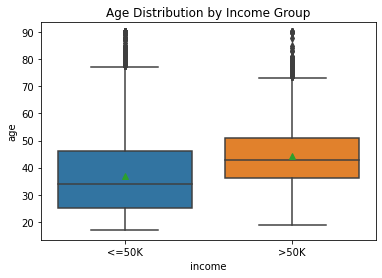

In [32]:
# Box plot of age by income group
sns.boxplot(x='income', y='age', data=adultDf_clean, showmeans= True)
plt.title('Age Distribution by Income Group')
plt.show()


In [33]:
#Performing Two-smample t-test - compare means of two groups

from scipy import stats  

from scipy.stats import ttest_ind
highincome_grp = adultDf_clean[adultDf_clean['income'] == '>50K']['age']
lowincome_grp = adultDf_clean[adultDf_clean['income'] == '<=50K']['age']


t_stat, p_value = ttest_ind(highincome_grp, lowincome_grp)
print('p value is %.9f' % p_value)
if p_value < 0.05:
    print("Reject the null hypothesis. Age is related to income.")
else:
    print("Accept the null hypothesis. Age is not related to income.")

p value is 0.000000000
Reject the null hypothesis. Age is related to income.


In [34]:
#T test for education number

highincome_grp = adultDf_clean[adultDf_clean['income'] == '>50K']['education-num']
lowincome_grp = adultDf_clean[adultDf_clean['income'] == '<=50K']['education-num']

t_stat, p_value = ttest_ind(highincome_grp, lowincome_grp)
print('p value is %.9f' % p_value)
if p_value < 0.05:
    print("Reject the null hypothesis. Education number is related to income.")
else:
    print("Accept the null hypothesis. Education number is not related to income.")

p value is 0.000000000
Reject the null hypothesis. Education number is related to income.


In [36]:
#T test for capital-gain

highincome_grp = adultDf_clean[adultDf_clean['income'] == '>50K']['capital-gain']
lowincome_grp = adultDf_clean[adultDf_clean['income'] == '<=50K']['capital-gain']

t_stat, p_value = ttest_ind(highincome_grp, lowincome_grp)
print('p value is %.9f' % p_value)
if p_value < 0.05:
    print("Reject the null hypothesis. Capital-gain is related to income.")
else:
    print("Accept the null hypothesis. Capital-gain is not related to income.")

p value is 0.000000000
Reject the null hypothesis. Capital-gain is related to income.


In [37]:
#T test for capital-loss

highincome_grp = adultDf_clean[adultDf_clean['income'] == '>50K']['capital-loss']
lowincome_grp = adultDf_clean[adultDf_clean['income'] == '<=50K']['capital-loss']

t_stat, p_value = ttest_ind(highincome_grp, lowincome_grp)
print('p value is %.9f' % p_value)
if p_value < 0.05:
    print("Reject the null hypothesis. Capital-loss is related to income.")
else:
    print("Accept the null hypothesis. Capital-loss is not related to income.")

p value is 0.000000000
Reject the null hypothesis. Capital-loss is related to income.


In [38]:
#T test for hours-per-week

highincome_grp = adultDf_clean[adultDf_clean['income'] == '>50K']['hours-per-week']
lowincome_grp = adultDf_clean[adultDf_clean['income'] == '<=50K']['hours-per-week']

t_stat, p_value = ttest_ind(highincome_grp, lowincome_grp)
print('p value is %.9f' % p_value)
if p_value < 0.05:
    print("Reject the null hypothesis. hours-per-week is related to income.")
else:
    print("Accept the null hypothesis. hours-per-week is not related to income.")

p value is 0.000000000
Reject the null hypothesis. hours-per-week is related to income.


In [39]:
#T test for fnlwgt

highincome_grp = adultDf_clean[adultDf_clean['income'] == '>50K']['fnlwgt']
lowincome_grp = adultDf_clean[adultDf_clean['income'] == '<=50K']['fnlwgt']

t_stat, p_value = ttest_ind(highincome_grp, lowincome_grp)
print('p value is %.9f' % p_value)
if p_value < 0.05:
    print("Reject the null hypothesis. fnlwgt is related to income.")
else:
    print("Accept the null hypothesis. fnlwgt is not related to income.")

p value is 0.161249806
Accept the null hypothesis. fnlwgt is not related to income.


### To test Categorical columns we use Chi square testing

Chi square test requires a contingency table which can be created using crosstab in python

In [40]:
from scipy.stats import chi2_contingency

#Creating a contingency table for workclass and income
contingency_table = pd.crosstab(adultDf_clean['workclass'], adultDf_clean['income'])

#Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(p)
if p < 0.05:
    print("Reject the null hypothesis. workclass is related to income.")
else:
    print("Accept the null hypothesis. workclass is not related to income.")

4.241101689036193e-297
Reject the null hypothesis. workclass is related to income.


In [41]:
contingency_table = pd.crosstab(adultDf_clean['education'], adultDf_clean['income'])

#Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print('p value is %.9f' % p)
if p < 0.05:
    print("Reject the null hypothesis. education is related to income.")
else:
    print("Accept the null hypothesis. education is not related to income.")

p value is 0.000000000
Reject the null hypothesis. education is related to income.


In [42]:
contingency_table = pd.crosstab(adultDf_clean['marital-status'], adultDf_clean['income'])

#Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print('p value is %.9f' % p)
if p < 0.05:
    print("Reject the null hypothesis. marital-status is related to income.")
else:
    print("Accept the null hypothesis. marital-status is not related to income.")

p value is 0.000000000
Reject the null hypothesis. marital-status is related to income.


In [43]:
contingency_table = pd.crosstab(adultDf_clean['occupation'], adultDf_clean['income'])

#Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print('p value is %.9f' % p)
if p < 0.05:
    print("Reject the null hypothesis. occupation is related to income.")
else:
    print("Accept the null hypothesis. occupation is not related to income.")

p value is 0.000000000
Reject the null hypothesis. occupation is related to income.


In [44]:
contingency_table = pd.crosstab(adultDf_clean['relationship'], adultDf_clean['income'])

#Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print('p value is %.9f' % p)
if p < 0.05:
    print("Reject the null hypothesis.relationship is related to income.")
else:
    print("Accept the null hypothesis. relationship is not related to income.")

p value is 0.000000000
Reject the null hypothesis.relationship is related to income.


In [45]:
#creating a function for chi square to test for remainning columns

def chi_square_test(data , column1, column2):
    contingency_tab = pd.crosstab(data[column1], data[column2])
    
    chi2, p ,dof, expected = chi2_contingency(contingency_tab)
    
    if p < 0.05:
        outcome = "Reject the null hypothesis. " + column1 + " is related to income."
    else:
        outcome = "Accept the null hypothesis. " + column1 + " is not related to income."
    
    return chi2, p , outcome

additional_columns_to_test = {
   
    'sex and income': ('sex', 'income'),
    'native country and income': ('native-country', 'income'),
    'race and income': ('race', 'income')

}

chi_square_results = {aspect: chi_square_test(adultDf_clean, *columns) for aspect, columns in additional_columns_to_test.items()}
chi_square_results

{'sex and income': (2248.847679013691,
  0.0,
  'Reject the null hypothesis. sex is related to income.'),
 'native country and income': (452.2290022454447,
  1.0356184275397302e-70,
  'Reject the null hypothesis. native-country is related to income.'),
 'race and income': (487.026286837627,
  4.284377710223499e-104,
  'Reject the null hypothesis. race is related to income.')}